In [2]:
#@title Imports & setup (run this first)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score,
                             precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_digits, fetch_california_housing

---
# Exercise 1 (Regression – House Prices)

**Dataset:** `sklearn.datasets.fetch_california_housing `(Are all features  useful?).

![](https://user-images.githubusercontent.com/48794028/148332938-4e66d4ca-2d16-474f-8482-340aef6a48d0.png)

Tasks:
- Split data into train/test.
- Train a `DecisionTreeRegressor`, `RandomForestRegressor`, and `GradientBoostingRegressor`.
- Compare models using `RMSE`.
- Plot predicted vs. true values for test set.


**Attribute Information:**
- `MedInc`        median income in block group
- `HouseAge`      median house age in block group
- `AveRooms`      average number of rooms per household
- `AveBedrms`     average number of bedrooms per household
- `Population`    block group population
- `AveOccup`      average number of household members
- `Latitude`      block group latitude
- `Longitude`     block group longitude

In [32]:
# TODO: Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [33]:
# Prepare features and target
X = X[["AveBedrms", "AveRooms", "HouseAge", "MedInc", "Population"]]#, "AveOccup", "Latitude", "Longitude"]]
y = housing.target

# TODO: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# TODO: Train DT, RF, GB
from math import sqrt
from xgboost import XGBRegressor

# Models
models = {
    "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: RMSE={sqrt(mean_squared_error(y_test, y_pred)):.2f}")

DecisionTree: RMSE=0.78
RandomForest: RMSE=0.73
GradientBoosting: RMSE=0.72
XGBoost: RMSE=0.74


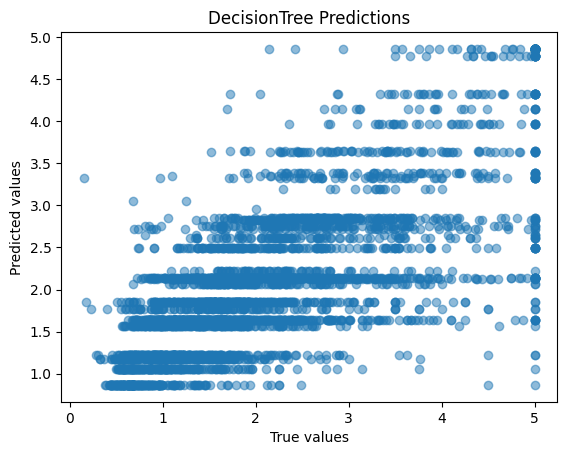

In [6]:
# Plot predictions
plt.scatter(y_test, models["DecisionTree"].predict(X_test), alpha=0.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("DecisionTree Predictions")
plt.show()

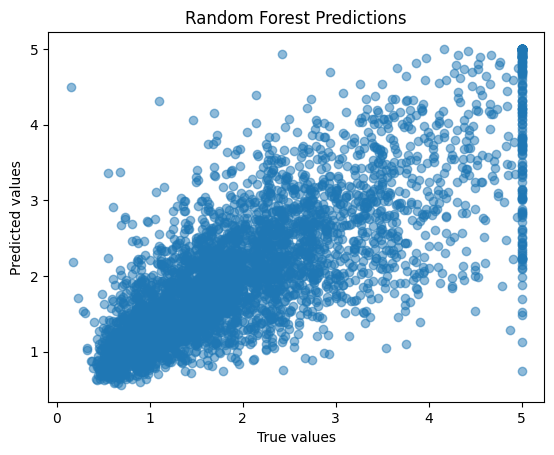

In [7]:
# Plot predictions
plt.scatter(y_test, models["RandomForest"].predict(X_test), alpha=0.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Random Forest Predictions")
plt.show()

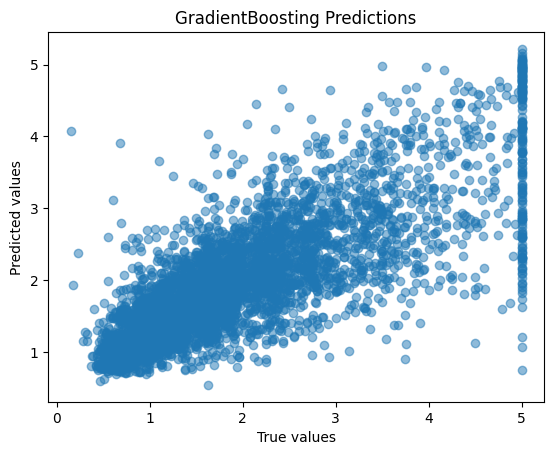

In [8]:
# Plot predictions
plt.scatter(y_test, models["GradientBoosting"].predict(X_test), alpha=0.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("GradientBoosting Predictions")
plt.show()

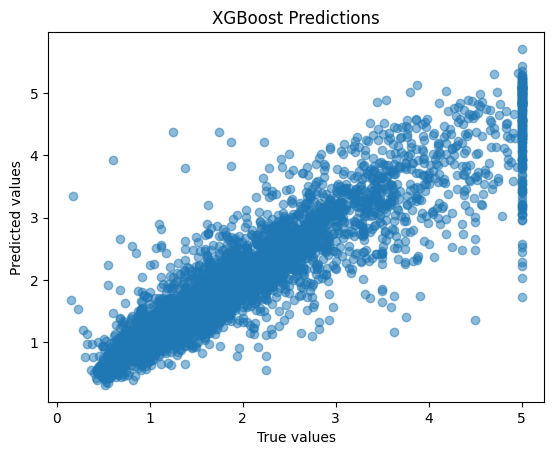

In [6]:
# Plot predictions
plt.scatter(y_test, models["XGBoost"].predict(X_test), alpha=0.5)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("XGBoost Predictions")
plt.show()

I asked for an explanation for the below code snippets

This code snippet is a great example of evaluating multiple regression models across different random seeds to assess their performance stability. Let’s break it down step by step:

You're training and testing four different regression models—Decision Tree, Random Forest, Gradient Boosting, and XGBoost—across 10 different random seeds to measure their performance using RMSE (Root Mean Squared Error). This helps you understand how sensitive each model is to data splits.

In [ ]:
# unlock seed and do repetitions

from math import sqrt
from xgboost import XGBRegressor

sqrt: Used to compute RMSE from MSE.

XGBRegressor: A powerful gradient boosting model from the XGBoost library.

In [ ]:
NUM_REPS = 10
SEEDS = list(range(NUM_REPS))

res_dict = {"Model": [], "Seed": [], "RMSE": []}

You’ll run 10 repetitions with seeds from 0 to 9.

res_dict stores results for each model and seed.

In [ ]:

# Each seed ensures a different train/test split for robustness testing.
for seed in SEEDS:
    # Train/test split
    # Splits the dataset into 80% training and 20% testing.
    # random_state=seed ensures reproducibility.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Models
    # Four models are initialized with consistent hyperparameters.
    # random_state=42 ensures model behavior is consistent across seeds.
    models = {
        "DecisionTree": DecisionTreeRegressor(max_depth=5, random_state=42),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    }

    # Each model is trained and tested.
    # RMSE is calculated and stored for each model/seed combo.
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        res_dict["Model"].append(name)
        res_dict["Seed"].append(seed)
        res_dict["RMSE"].append(sqrt(mean_squared_error(y_test, y_pred)))
        
# Show results (standard error of the mean)
# Converts results to a DataFrame.
# Groups by model and computes mean and standard deviation of RMSE.
res_df = pd.DataFrame(res_dict)
print(res_df.groupby("Model").agg({"RMSE": ["mean", "std"]}))


                      RMSE          
                      mean       std
Model                               
DecisionTree      0.764444  0.010058
GradientBoosting  0.709796  0.007950
RandomForest      0.721010  0.008681
XGBoost           0.728466  0.007212


📊 Why This Is Useful
- Mean RMSE tells you how well each model performs on average.
- Standard deviation shows how consistent the model is across different data splits.
- This approach is more robust than relying on a single train/test split.

**Lower is better** when it comes to RMSE (Root Mean Squared Error).

### 🔍 What RMSE Measures
RMSE quantifies the average magnitude of error between your model’s predictions and the actual values. Since it’s the square root of the average squared differences, it’s expressed in the same units as your target variable, making it easy to interpret.

### ✅ Why Lower RMSE Is Better
- A **lower RMSE** means your model’s predictions are **closer to the actual values**.
- A **higher RMSE** indicates **larger errors**, meaning the model is less accurate.

### 📌 Example
If you're predicting house prices in thousands of euros:
- RMSE of **2.5** → predictions are off by about €2,500 on average.
- RMSE of **10.0** → predictions are off by about €10,000 on average.

### ⚠️ Things to Keep in Mind
- RMSE should be interpreted **relative to the scale of your target variable**.
- It’s most useful when comparing models on the **same dataset**.

## 📉 Why Low Standard Deviation Matters

### 🔁 What Standard Deviation Measures
Standard deviation tells you how much your model’s performance (e.g., RMSE) **varies** across different train/test splits or random seeds.

### ✅ Why Lower Is Better
- A **low standard deviation** means your model is **consistent and stable**.
- A **high standard deviation** suggests your model’s performance is **unpredictable**—it might do well on one split and poorly on another.

### 📌 Example
Let’s say two models have the same average RMSE of 5.0:
- Model A: RMSE standard deviation = **0.2** → very stable
- Model B: RMSE standard deviation = **2.0** → highly variable

Even though their average performance is the same, Model A is more trustworthy.

---

### 🧠 Summary
- **Low RMSE** → better accuracy
- **Low standard deviation** → better reliability

Together, they help you choose models that are not only accurate but also dependable.

---
# Exercise 2(Regression – California Housing Extended)

Same dataset.

**Tasks:**
- Train models with different `max_depth` and `n_estimators`.
- Use cross-validation to compare performance.
- Visualize feature importance for Random Forest & Gradient Boosting.

In [9]:
# TODO: Try different hyperparameters (max_depth, n_estimators)
# TODO: Use cross_val_score for evaluation

# Define parameter grids for GridSearchCV
param_grid_rf = {
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 200]
}

param_grid_gb = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid_rf, cv=5,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best RMSE for Random Forest:", grid_search_rf.best_score_)

# GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                              param_grid_gb,
                              cv=5,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(X_train, y_train)

print("\nBest parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best RMSE for Gradient Boosting:", grid_search_gb.best_score_)

# Get the best performing models
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

print("\nBest Random Forest Model:", best_rf_model)
print("Best Gradient Boosting Model:", best_gb_model)


Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best RMSE for Random Forest: -0.7067500382719176

Best parameters for Gradient Boosting: {'max_depth': 5, 'n_estimators': 50}
Best RMSE for Gradient Boosting: -0.7006818407525011

Best Random Forest Model: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
Best Gradient Boosting Model: GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)


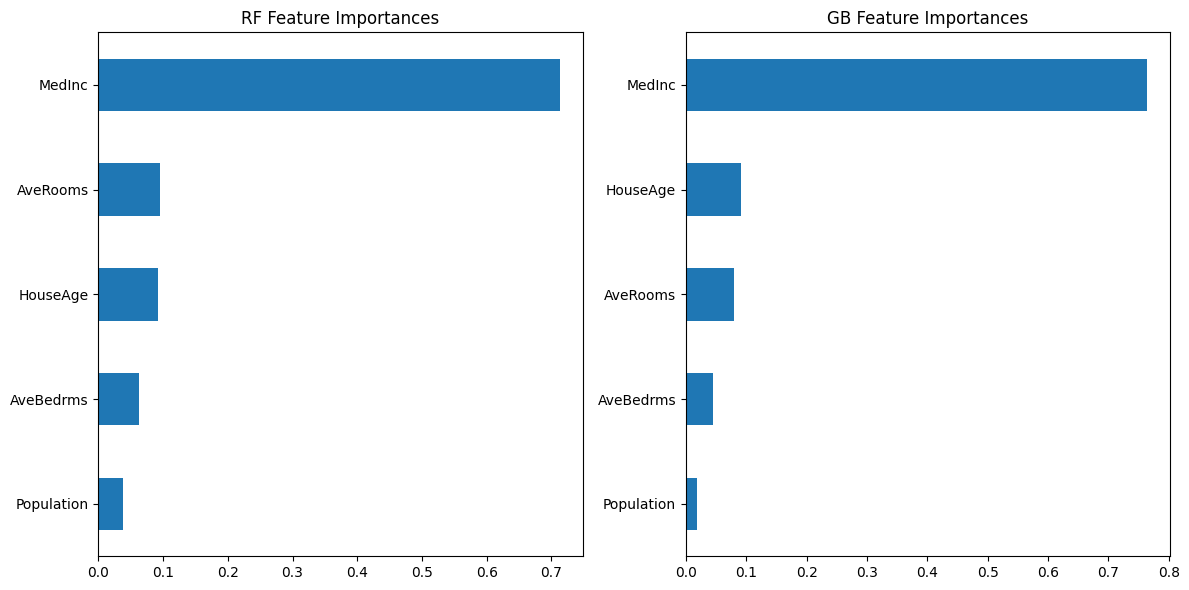

In [11]:
# TODO: Plot feature importances

figure, axes = plt.subplots(1, 2, figsize=(12, 6))

# Random Forest Feature Importance
best_rf_model.fit(X, y)
feat_imp_rf = pd.Series(best_rf_model.feature_importances_, index=X.columns)
feat_imp_rf.sort_values().plot(kind="barh", ax=axes[0], title="RF Feature Importances")

# Gradient Boosting Feature Importance
best_gb_model.fit(X, y)
feat_imp_gb = pd.Series(best_gb_model.feature_importances_, index=X.columns)
feat_imp_gb.sort_values().plot(kind="barh", ax=axes[1], title="GB Feature Importances")

plt.tight_layout()
plt.show()

---
# Exercise 3 (Classification – Digits Dataset)

Dataset: load_digits()

**Tasks:**
- Multi-class classification (0–9).
- Train DT, RF, GB.
- Evaluate with cross-validation accuracy.
- Print classification report.
- Plot confusion matrix.
- Visualize 10 misclassified digits → discuss why.

In [8]:
# TODO: Load digits dataset
digits = load_digits()
X, y = digits.data, digits.target

In [9]:
X.shape, y.shape

((1797, 64), (1797,))

In [10]:
# TODO: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
# TODO: Train models +  Evaluate with CV

models = {
    "DecisionTree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    print(f"{name}: CV Accuracy={scores.mean():.3f} \pm {scores.std():.3f}")

DecisionTree: CV Accuracy=0.789 \pm 0.037
RandomForest: CV Accuracy=0.941 \pm 0.020
GradientBoosting: CV Accuracy=0.929 \pm 0.028


In [15]:
# classification report
# Evaluate best model (RF)
rf = models["RandomForest"]
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nClassification Report (RandomForest):\n", classification_report(y_test, y_pred))


Classification Report (RandomForest):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.92      0.97      0.95        36
           2       1.00      0.97      0.99        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.92      1.00      0.96        36
           8       0.94      0.86      0.90        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



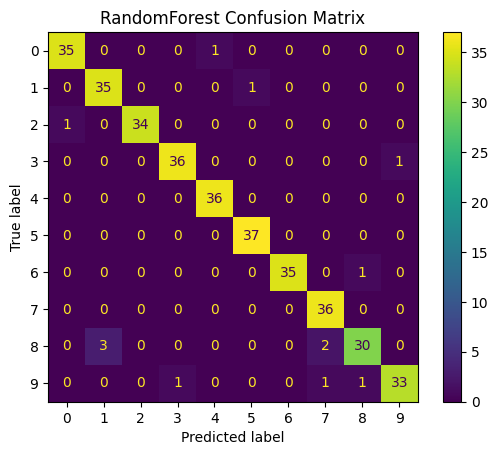

In [16]:
# TODO: Plot confusion matrix

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("RandomForest Confusion Matrix")
plt.show()

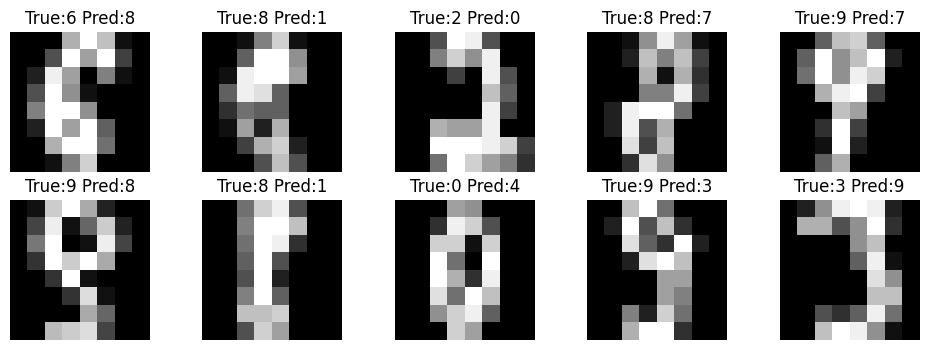

In [18]:
# TODO: Visualize misclassified examples
misclassified = np.where(y_test != y_pred)[0][:10]  # first 10 mistakes
plt.figure(figsize=(12,4))
for i, idx in enumerate(misclassified):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[idx].reshape(8,8), cmap="gray")
    plt.title(f"True:{y_test[idx]} Pred:{y_pred[idx]}")
    plt.axis("off")
plt.show()

In [ ]:
#Discussion:
# DT overfits badly on high-dimensional data.
# RF and GB handle it better, but for images → specialized models (CNNs) outperform them.